# Brunch Data Analysis

**Brunch** is one of the biggest blog platforms in South Korea. This study will investigate what factors made writers more famous and influential. 

- It is based on the data collected on 24 August 2017

In [1]:
import pandas as pd
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from data_management import read_related_data, get_list_df_by_writers, \
                            get_article_df_by_writers, get_follower_df_by_writers, \
                            get_following_df_by_writers, parse_datetime

In [3]:
df = read_related_data()

## The writers who have 5000+ followers

- The number of writers who are followed by over 5000 members is 162
- The average of the number of followers is 7589
- The average of writer count and article count are 150, 166, but the standard deviation is 767, 224
- The writer who has the least articles wrote only 8 to get over 5000 followers
- The impact of article count on follower count is not relevant 

In [4]:
top_df = df[df["follower_count"] > 5000].sort_values("follower_count", ascending=False).iloc[1:,]
top_df[top_df["follower_count"] > 10000].count()

profile_id        26
count             26
user_id           26
username          26
follower_count    26
writer_count      26
article_count     26
dtype: int64

In [5]:
top_df.describe()

,count,follower_count,writer_count,article_count
count,162.000000,162.00000,162.000000,162.000000
mean,456.475309,7589.04321,149.654321,165.944444
std,411.724192,2527.17562,767.096521,223.593277
min,71.000000,5010.00000,0.000000,8.000000
25%,297.250000,5752.00000,8.000000,55.250000
50%,404.500000,6818.00000,25.000000,113.500000
75%,525.000000,8573.25000,60.000000,189.750000
max,5009.000000,22154.00000,9084.000000,1747.000000


In [6]:
top_df.sort_values("article_count").head()

,profile_id,count,user_id,username,follower_count,writer_count,article_count
552,thespringtocome,71,RqM,오늘,5692,1,8
1732,kimkwan,172,2zw,김관,6105,20,11
1218,yoonhanna,245,3u4,hanna,5023,63,12
544,2kija,437,6i4,이기주작가,7300,8,13
248,gzerof,369,xYA,홍준호,6086,51,14


In [7]:
top_df.sort_values("article_count", ascending=False).head()

,profile_id,count,user_id,username,follower_count,writer_count,article_count
74,wikitree,545,Jp6,위키트리 WIKITREE,8775,1,1747
83,bookdb,522,ocv,인터파크 북DB,5947,1,1393
217,dong02,410,iDz,이동영 작가의 글쓰기,5940,15,1028
470,brunchflgu,806,oZ3,조우성 변호사,10606,46,992
573,hitchwill,465,3kT,나는 누군가,7250,6,866


In [8]:
np.corrcoef(top_df["follower_count"], top_df["writer_count"])[0, 1]

-0.05407113062275383

In [9]:
np.corrcoef(top_df["follower_count"], top_df["article_count"])[0, 1]

0.079968862893865525

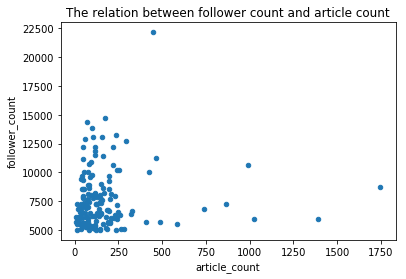

In [84]:
top_df.plot(kind="scatter", x="article_count", y="follower_count", 
            title="The relation between follower count and article count")

## The articles whose writer has 5000+ followers

### The relation between SNS share count and like count

- These two factors are strongly related
- Sharing numbers are much bigger than like counts

In [11]:
top_articles = get_article_df_by_writers(top_df["profile_id"].values)
top_articles_cleaned = top_articles.drop([
    "articleCoverColorForHome", "magazineArticleId", "coverColor", "contentId", "magazineNo", 
    "magazineType", "readSeconds", "pick", "userId", "sharedFacebookComment", "status"], 1)
parse_datetime(top_articles_cleaned, fields=["createTime", "publishTime", "updateTime"])

In [12]:
np.corrcoef(top_articles_cleaned["socialShareTotalCount"], top_articles_cleaned["likeCount"])[0, 1]

0.51849899507926045

In [13]:
top_articles_cleaned.sort_values("socialShareTotalCount", ascending=False).iloc[:5, 6:12]

,magazineTitle,no,profileId,publishTime,socialShareTotalCount,subTitle
148,NaN,73,stillalive31,2015-08-11 14:35:54,61234,"반드시 피해야 할 지극히 나쁜 언행, 6천(賤)"
34,삶의 교훈,389,jade,2016-08-24 10:59:21,55222,NaN
294,NaN,35,sunsutu,2016-01-26 16:24:01,31780,전원주택 공사 시공 편
669,리더십 조직관리 Must Know,202,brunchflgu,2015-10-08 17:49:01,25334,조우성 변호사의 비즈니스 인사이트
47,퇴사의 추억,27,suhanjang,2015-09-25 11:06:47,25087,NaN


In [14]:
top_articles_cleaned \
    .drop(["magazineAddress", "magazineTitle", "socialShareTotalCount", "ip"], 1) \
    .sort_values("likeCount", ascending=False).iloc[:5, 3:9]

,likeCount,no,profileId,publishTime,subTitle,title
34,734,389,jade,2016-08-24 10:59:21,NaN,잠시 생각해 볼만한 그림들
130,699,44,lunarshore,2016-03-14 05:45:39,차별화 전략을 잃어버린 브랜드가 망가지는 수순,브랜드가 망가지는 9단계
60,696,12,haneulalice,2015-11-12 00:55:51,저녁이 없는 삶은 누가 만든걸까요?,당신의 이직을 바랍니다
21,668,68,dohyunkim,2016-01-12 17:54:08,TED 해설강의 by NYU 유학생,6개월만에 영어를 마스터 하는 것이 가능할까?
96,658,264,jade,2016-03-28 12:05:35,NaN,바쁜 사람과 유능한 사람의 12가지 차이


In [15]:
top_articles_cleaned \
    .drop(["createTime", "likeCount", "magazineAddress", "magazineTitle", "socialShareTotalCount", "ip"], 1) \
    .sort_values("commentCount", ascending=False).iloc[:5, 1:9]

,commentCount,no,profileId,publishTime,subTitle,title,updateTime
68,310,42,dalda,2016-02-17 17:58:03,오늘은 달다,대한민국 남자들,2017-01-04 00:01:09
1672,273,80,wikitree,2015-12-31 14:50:37,NaN,남자가 결혼상대로 피해야 하는 '여자 유형' 8가지,2017-08-16 00:01:47
77,228,152,brunch27uc,2016-06-11 05:48:02,결혼할 여자를 고르는 법,결혼해서는 안 될 여자,2017-06-17 10:20:54
13,219,67,nitro2red,2016-05-18 05:21:30,곡성에 나타난 상징에 대한 분석,귀신이 곡할 영화 '곡성',2017-08-22 17:06:36
43,191,8,goodrain,2015-11-09 18:55:59,NaN,07. 헤어진 사람에게,2017-08-13 19:05:10


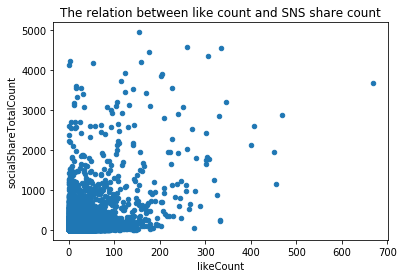

In [86]:
top_articles_cleaned[top_articles_cleaned["socialShareTotalCount"] < 5000] \
    .plot(kind="scatter", x="likeCount", y="socialShareTotalCount", 
          title="The relation between like count and SNS share count")

### How are top articles?

- The average of the number of images is 5.45, and the standard deviation is 8.46
- The mean of comment, like, SNS share is 3.61, 11.66, 60.12

In [17]:
top_articles_cleaned.drop(["no"], 1).describe()

,articleImageList,commentCount,likeCount,socialShareTotalCount
count,26891.000000,26891.000000,26891.000000,26891.000000
mean,5.451006,3.610093,11.655238,60.121676
std,8.457590,8.765005,25.753824,690.119018
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000
50%,3.000000,1.000000,5.000000,2.000000
75%,6.000000,4.000000,12.000000,14.000000
max,147.000000,310.000000,734.000000,61234.000000


### How they write?

- The total number of articles of writers with 5000+ followers is gradually increasing
- 98% of them started writing on Brunch before March 2016

[<matplotlib.text.Text at 0x126f07978>, <matplotlib.text.Text at 0x126eea240>]

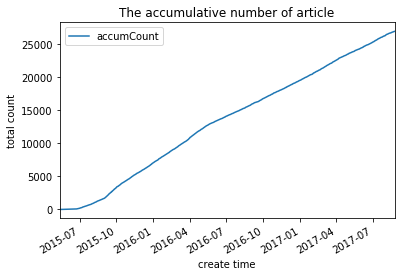

In [89]:
top_articles_cleaned = top_articles_cleaned.sort_values("createTime", ascending=True)
top_articles_cleaned["default"] = 1
top_articles_cleaned["accumCount"] = top_articles_cleaned["default"].cumsum()
ax = top_articles_cleaned.plot(x="createTime", y="accumCount", title="The accumulative number of article")
ax.set(xlabel="create time", ylabel="total count")

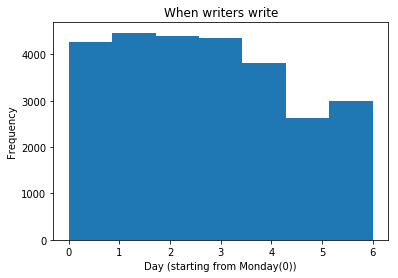

In [90]:
top_articles_cleaned["day"] = top_articles_cleaned["createTime"].apply(lambda x: x.weekday())
ax = top_articles_cleaned["day"].plot(kind="hist", x="day", bins=7, title="When writers write")
ax.set(xlabel="Day (starting from Monday(0))")

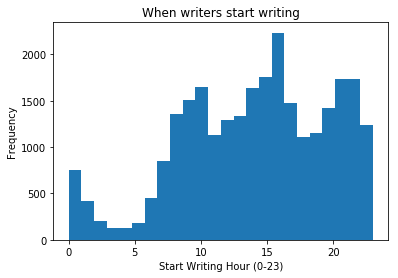

In [94]:
top_articles_cleaned["writingHour"] = top_articles_cleaned["createTime"].apply(lambda x: x.hour)
ax = top_articles_cleaned["writingHour"].plot(kind="hist", x="writingHour", bins=24, 
                                              title="When writers start writing")
ax.set(xlabel="Start Writing Hour (0-23)")

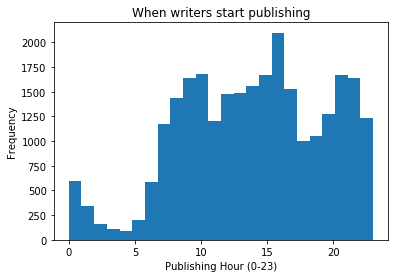

In [95]:
top_articles_cleaned["publishingHour"] = top_articles_cleaned["publishTime"].apply(lambda x: x.hour)
ax = top_articles_cleaned["publishingHour"].plot(kind="hist", x="publishingHour", bins=24, 
                                            title="When writers start publishing")
ax.set(xlabel="Publishing Hour (0-23)")

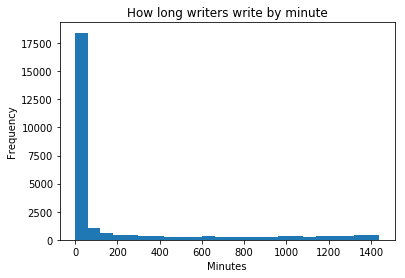

In [96]:
top_articles_cleaned["writingDuration"] = top_articles_cleaned["publishTime"] - top_articles_cleaned["createTime"]
top_articles_cleaned["writingDuration"] = top_articles_cleaned["writingDuration"].apply(lambda x: x.seconds / 60)
ax = top_articles_cleaned["writingDuration"].plot(kind="hist", x="writingDuration", bins=24, 
                                                 title="How long writers write by minute")
ax.set(xlabel="Minutes")

### Articles written within 15 minutes
- It means writers usually don't use the built-in writing system in brunch

In [23]:
top_articles_cleaned[top_articles_cleaned["writingDuration"] < 15]["writingDuration"].count() \
    / top_articles_cleaned["writingDuration"].count() * 100

61.585660629950546

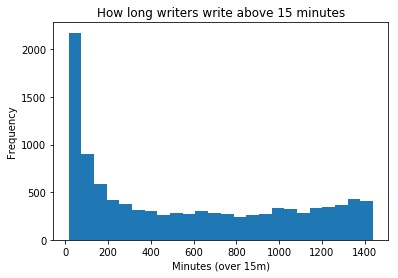

In [97]:
ax = top_articles_cleaned[top_articles_cleaned["writingDuration"] > 15]["writingDuration"] \
        .plot(kind="hist", x="writingDuration", bins=24, title="How long writers write above 15 minutes")
ax.set(xlabel="Minutes (over 15m)")

In [26]:
top_articles_cleaned.query("writingDuration > 15 & writingDuration < 300")["writingDuration"].count() \
/ top_articles_cleaned["writingDuration"].count() * 100

16.250790227213567

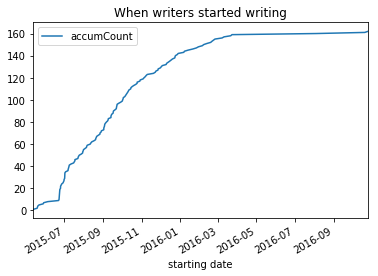

In [98]:
unique_top_writers = top_df["profile_id"].unique()
top_first_article_time = pd.DataFrame(
    [top_articles_cleaned[top_articles_cleaned["profileId"] == writer].iloc[0]["createTime"]
     for writer in unique_top_writers],
    columns=["time"]
)
top_first_article_time = top_first_article_time.sort_values("time")
top_first_article_time["default"] = 1
top_first_article_time["accumCount"] = top_first_article_time["default"].cumsum()
ax = top_first_article_time.plot(x="time", y="accumCount", title="When writers started writing")
ax.set(xlabel="starting date")

[<matplotlib.text.Text at 0x12d7ea978>, <matplotlib.text.Text at 0x12df120f0>]

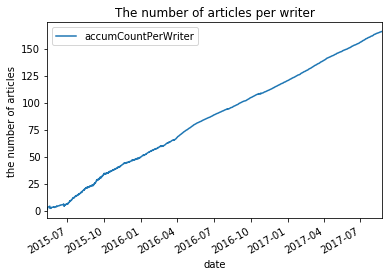

In [99]:
def find_writer_count_of_lastest_time(time:pd.datetime) -> int:
    result_values = top_first_article_time[top_first_article_time["time"] < time]["accumCount"].values
    if len(result_values) == 0:
        return 1
    return result_values[-1]
top_articles_cleaned["accumCountPerWriter"] = \
    top_articles_cleaned["accumCount"] / top_articles_cleaned["createTime"].apply(find_writer_count_of_lastest_time)
ax = top_articles_cleaned.plot(x="createTime", y="accumCountPerWriter", title="The number of articles per writer")
ax.set(xlabel="date", ylabel="the number of articles")

In [29]:
top_followers = get_follower_df_by_writers(top_df["profile_id"].values)
top_followers_cleaned = top_followers.drop(["articleCount", "userId", "myFollower", "myWriter", "subscribeNo"], 1)
parse_datetime(top_followers_cleaned, fields=["createTime"])
top_followers_cleaned.head()

,createTime,description,followerCount,profileId,userName,writerCount
0,2017-08-24 08:04:50,MAGARETT의 브런치입니다.,0,megan-yoon,MAGARETT,48
1,2017-08-24 07:29:31,구구의 브런치입니다.,0,jungulism,구구,8
2,2017-08-24 07:28:40,김보람의 브런치입니다.,0,kimboroam,김보람,2
3,2017-08-24 06:59:06,한수연의 브런치입니다.,1,nownhere23,한수연,50
4,2017-08-24 06:52:07,풍꼬의 브런치입니다.,0,ljk4936,풍꼬,159


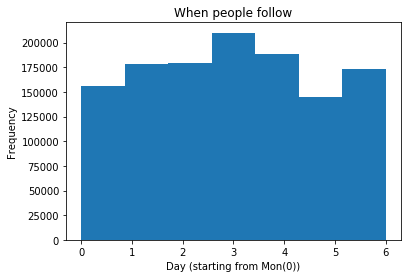

In [100]:
top_followers_cleaned["day"] = top_followers_cleaned["createTime"].apply(lambda x: x.weekday())
ax = top_followers_cleaned["day"].plot(kind="hist", x="day", bins=7, title="When people follow 1")
ax.set(xlabel="Day (starting from Mon(0))")

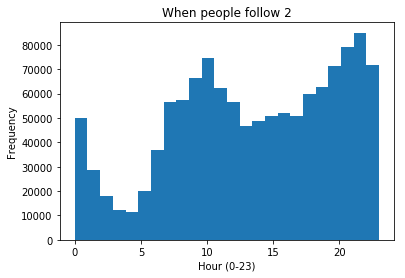

In [102]:
top_followers_cleaned["followingHour"] = top_followers_cleaned["createTime"].apply(lambda x: x.hour)
ax = top_followers_cleaned["followingHour"].plot(kind="hist", x="followingHour", bins=24,
                                                title="When people follow 2")
ax.set(xlabel="Hour (0-23)")

### Tricky growth of Brunch

- What did happen in May 2016?
- The figure below includes duplicate followers of writers
- The number of fans on 30 April 2016 is 4.28 times more than the one on 31 March 2016
- This steep growth was affected by a marketing campaign, in which Kakao, the service provider, gave free promotional Kakaotalk emoticons

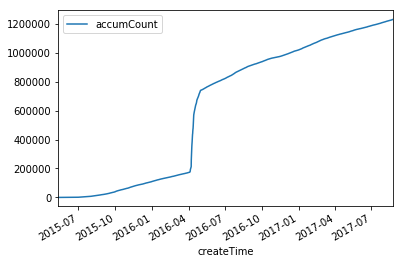

In [31]:
top_followers_cleaned = top_followers_cleaned.sort_values("createTime", ascending=True)
top_followers_cleaned["default"] = 1
top_followers_cleaned["accumCount"] = top_followers_cleaned["default"].cumsum()
ax = top_followers_cleaned.plot(x="createTime", y="accumCount", title="When people follow 3")
ax.set(xlabel="")

### For fun : The authors who the writers with 5000+ followers like most

In [32]:
top_followings = get_following_df_by_writers(top_df["profile_id"].values)
top_followings_cleaned = top_followings.drop(["articleCount", "userId", "myFollower", "myWriter", "subscribeNo"], 1)
parse_datetime(top_followings_cleaned, fields=["createTime"])
top_followings_cleaned["profileId"].value_counts()[1:13]

hyejinchoi      45
daljasee        44
kooning11       40
suhanjang       37
blade31         33
2kija           32
romanticgrey    32
eastgo          31
onec            31
dalda           31
jimmyrim        30
sustainlife     30
Name: profileId, dtype: int64

# Conclusion

- The number of writers with over 5000 followers is 162 
- The correlation between article count and follower count is low, which does not encourage authors to write more articles
- The user engagement of Brunch is focused on the share of SNS
- There was a strong marketing campaign on April 2016

## Limitation of this study

- It is not examined if the Kakaotalk marketing campaign helped the growth of Brunch
- To figure it out, the active user data should be backed up 